# Lab 머신러닝 - BMI

* 대량의 데이터 생성
* 훈련, 테스트 데이터 나누기
* 교차검증

<img width="20%" src="https://i.imgur.com/9goz5Hw.png" >
   

**2018-2022 FinanceData.KR http://facebook.com/financedata**

In [ ]:
import matplotlib.pyplot as plt


```python
BMI = 몸무게(kg) / 키(m) ** 2
```

표준 몸무게 18.5 <= BMI < 25


In [ ]:
import numpy as np

weights = np.random.uniform(40, 200, 10)
weights

array([  88.78855234,  144.77054708,   56.43590786,  184.39531035,
         89.83165676,   87.91193998,  157.56943062,  154.49242548,
         42.7158912 ,  197.02566906])

In [ ]:
heights = np.random.uniform(1.60, 2.40, 10)
heights

array([ 1.71740109,  2.31289985,  1.85242012,  2.09880013,  2.10618076,
        2.32591371,  2.16654659,  2.2941191 ,  2.1300416 ,  2.18354069])

In [ ]:
import pandas as pd

In [ ]:
data = {
    'weight': np.random.uniform(40, 100, 10),
    'height': np.random.uniform(1.5, 2.0, 10),
}

data

{'height': array([ 1.88747027,  1.85066565,  1.97780781,  1.77455185,  1.53483484,
         1.66812697,  1.72229679,  1.68324289,  1.95302801,  1.88265054]),
 'weight': array([ 61.43475206,  64.8573771 ,  50.13669764,  79.22070505,
         72.39773377,  85.28594534,  99.20890745,  86.934427  ,
         77.80477543,  60.43410013])}

In [ ]:
df = pd.DataFrame(data)
df

,height,weight
0,1.887470,61.434752
1,1.850666,64.857377
2,1.977808,50.136698
3,1.774552,79.220705
4,1.534835,72.397734
5,1.668127,85.285945
6,1.722297,99.208907
7,1.683243,86.934427
8,1.953028,77.804775
9,1.882651,60.434100


In [ ]:
df['status'] = 'norm'
df.loc[df['weight'] / df['height']**2 >= 25, 'status'] = 'fat'
df.loc[df['weight'] / df['height']**2 < 18.5, 'status'] = 'thin'

df

,height,weight,status
0,1.887470,61.434752,thin
1,1.850666,64.857377,norm
2,1.977808,50.136698,thin
3,1.774552,79.220705,fat
4,1.534835,72.397734,fat
5,1.668127,85.285945,fat
6,1.722297,99.208907,fat
7,1.683243,86.934427,fat
8,1.953028,77.804775,norm
9,1.882651,60.434100,thin


# 훈련 데이터, 테스트 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['weight', 'height']], df['status'])

In [ ]:
X_train

,weight,height
2,50.136698,1.977808
6,99.208907,1.722297
0,61.434752,1.887470
8,77.804775,1.953028
4,72.397734,1.534835
7,86.934427,1.683243
5,85.285945,1.668127


In [ ]:
X_test

,weight,height
9,60.434100,1.882651
3,79.220705,1.774552
1,64.857377,1.850666


In [ ]:
y_train

2    thin
6     fat
0    thin
8    norm
4     fat
7     fat
5     fat
Name: status, dtype: object

In [ ]:
y_test

9    thin
3     fat
1    norm
Name: status, dtype: object

In [ ]:
# 훈련하기
from sklearn import svm

m = svm.SVC()
m.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# 예측하기
predict = m.predict(X_test)
predict

array(['thin', 'fat', 'fat'], dtype=object)

In [ ]:
# 성능평가
from sklearn import svm, metrics

scroe = metrics.accuracy_score(y_test, predict)
scroe

0.66666666666666663

# 교차 검증 (cross validation)

In [ ]:
# 정리
# 10000개 데이터를 생성하여 훈련

import numpy as np
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

data = {
    'weight': np.random.uniform(40, 100, 10000),
    'height': np.random.uniform(1.5, 2.0, 10000),
}

df = pd.DataFrame(data)

df['status'] = 'normal'
df.loc[df['weight'] / df['height']**2 >= 25, 'status'] = 'fat'
df.loc[df['weight'] / df['height']**2 < 18.5, 'status'] = 'thin'

X = df[['weight', 'height']]
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 훈련하기
m = svm.SVC()
m.fit(X_train, y_train)

# 예측하기
predict = m.predict(X_test)

# 성능평가
scroe = metrics.accuracy_score(y_test, predict)
scroe

0.92949999999999999

In [ ]:
# 과체중, 정상, 저체중
df['status'].value_counts()

fat       3803
normal    3385
thin      2812
Name: status, dtype: int64

# confustion metrics
* precision(정밀도): True로 예측한 것 중이 실제 True 비율
* recall(재현율): 실제 True인 것 중에 True로 예측한 비율
* f1-score: 정밀도(Precision)과 재현율(Recall)의 가중 조화 평균
* support: y_true 개수

In [ ]:
report = metrics.classification_report(y_test, predict)
print(report)

             precision    recall  f1-score   support

        fat       0.92      0.94      0.93       757
     normal       0.90      0.90      0.90       700
       thin       0.98      0.95      0.96       543

avg / total       0.93      0.93      0.93      2000



# 시각화

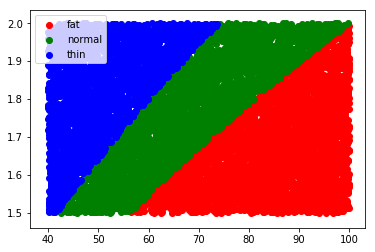

In [ ]:
df_fat = df[df.status=='fat']
plt.scatter(df_fat['weight'], df_fat['height'], c='r', label='fat')

df_norm = df[df.status=='normal']
plt.scatter(df_norm['weight'], df_norm['height'], c='g', label='normal')

df_thin = df[df.status=='thin']
plt.scatter(df_thin['weight'], df_thin['height'], c='b', label='thin')

plt.legend()

**2018-2022 FinanceData.KR http://facebook.com/financedata**